In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/partha/Desktop/loans.csv', low_memory=False)
pd.set_option("display.max_columns",None)

In [4]:
lis = ['id', 'term', 'emp_title', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']
df1=df[lis]

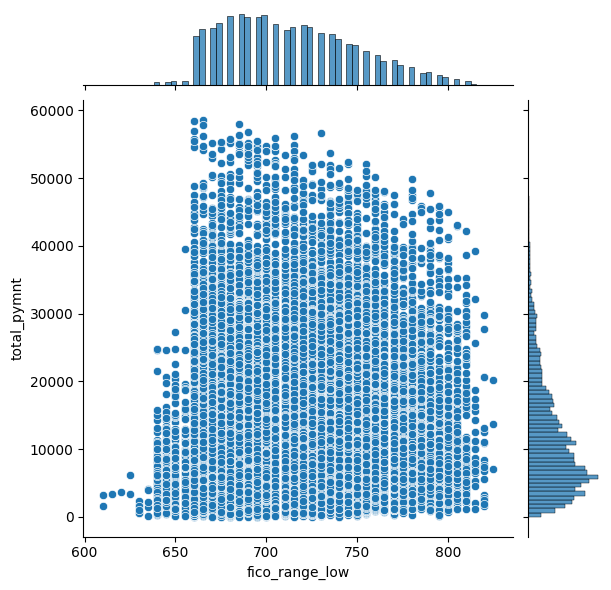

In [5]:
sns.jointplot(x = 'fico_range_low', y = 'total_pymnt', data = df1)

term
purpose
emp_title
annual_inc
delinq_2yrs
loan_amnt
emp_length
fico_range_high

In [74]:
df1 = pd.DataFrame({'term': df['term'], 'title': df['title'],'issue_d': df['issue_d'] ,'purpose': df['purpose'], 'emp_title': df['emp_title'], 'annual_inc': df['annual_inc'],'loan_amnt': df['loan_amnt'], 'total_pymnt': df['total_pymnt'],'emp_length': df['emp_length'], 'fico_range_high': df['fico_range_high'],'loan_status': df['loan_status'], 'verification_status': df['verification_status'], 'mths_since_last_delinq': df['mths_since_last_delinq']})
df1.head(10)

,term,title,issue_d,purpose,emp_title,annual_inc,loan_amnt,total_pymnt,emp_length,fico_range_high,loan_status,verification_status,mths_since_last_delinq
0,36 months,Computer,Dec-11,credit_card,NaN,24000.0,5000.0,5863.155187,10+ years,739.0,Fully Paid,Verified,NaN
1,60 months,bike,Dec-11,car,Ryder,30000.0,2500.0,1008.710000,< 1 year,744.0,Charged Off,Source Verified,NaN
2,36 months,real estate business,Dec-11,small_business,NaN,12252.0,2400.0,3005.666844,10+ years,739.0,Fully Paid,Not Verified,NaN
3,36 months,personel,Dec-11,other,AIR RESOURCES BOARD,49200.0,10000.0,12231.890000,10+ years,694.0,Fully Paid,Source Verified,35.0
4,60 months,Personal,Dec-11,other,University Medical Group,80000.0,3000.0,3784.490000,1 year,699.0,Current,Source Verified,38.0
5,36 months,My wedding loan I promise to pay back,Dec-11,wedding,Veolia Transportaton,36000.0,5000.0,5632.210000,3 years,734.0,Fully Paid,Source Verified,NaN
6,60 months,Loan,Dec-11,debt_consolidation,Southern Star Photography,47004.0,7000.0,10137.840010,8 years,694.0,Fully Paid,Not Verified,NaN
7,36 months,Car Downpayment,Dec-11,car,MKC Accounting,48000.0,3000.0,3939.135294,9 years,664.0,Fully Paid,Source Verified,NaN
8,60 months,Expand Business & Buy Debt Portfolio,Dec-11,small_business,NaN,40000.0,5600.0,646.020000,4 years,679.0,Charged Off,Source Verified,NaN
9,60 months,Building my credit history.,Dec-11,other,Starbucks,15000.0,5375.0,1476.190000,< 1 year,729.0,Charged Off,Verified,NaN


In [7]:
list = []
count = 0
for i in df1['loan_status']:
    if i not in list:
        list.append(i)

list

['Fully Paid',
 'Charged Off',
 'Current',
 'In Grace Period',
 'Late (31-120 days)',
 'Late (16-30 days)',
 'Default',
 nan,
 'Does not meet the credit policy. Status:Fully Paid',
 'Does not meet the credit policy. Status:Charged Off']

In [8]:
df1['loan_status'] = df1['loan_status'].apply(lambda x: 'Charged Off' if x not in ['Fully Paid', 'Charged Off', 'Current', 'Does not meet the credit policy. Status:Fully Paid'] else x)
df1['loan_status'] = df1['loan_status'].apply(lambda x: 'Fully Paid' if x not in ['Fully Paid', 'Charged Off'] else x)


In [9]:
list = []
count = 0
for i in df1['loan_status']:
    if i not in list:
        list.append(i)

list

['Fully Paid', 'Charged Off']

## Encoding Required Columns

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['purpose'] = le.fit_transform(df1['purpose'])
df1['emp_title'] = le.fit_transform(df1['emp_title'])
df1['fico_range_high'] = le.fit_transform(df1['fico_range_high'])
# df1['fico_range_low'] = le.fit_transform(df1['fico_range_low'])
df1['term'] = le.fit_transform(df1['term'])
df1['emp_length'] = le.fit_transform(df1['emp_length'])
df1['annual_inc'] = le.fit_transform(df1['annual_inc'])
df1['loan_amnt'] = le.fit_transform(df1['loan_amnt'])
df1['loan_status'] = le.fit_transform(df1['loan_status'])
df1['issue_d'] = le.fit_transform(df1['issue_d'])
df1['verification_status'] = le.fit_transform(df1['verification_status'])
df1['title'] = le.fit_transform(df1['title'])
df1['total_pymnt'] = le.fit_transform(df1['total_pymnt'])
df1['mths_since_last_delinq'] = le.fit_transform(df1['mths_since_last_delinq'])

In [11]:
list = []
for i in df1['loan_status']:
    if i not in list:
        list.append(i)
list

[1, 0]

# WOE and IV Binning

In [12]:
def calculate_woe_iv(df, column, target_column):
    # Create a DataFrame to store WoE and IV information
    woe_iv_df = pd.DataFrame()

    # Calculate the total count of positive and negative instances
    total_positive = df[target_column].sum()
    total_negative = df.shape[0] - total_positive

    # Calculate the total count of each category in the column
    category_counts = df.groupby(column)[target_column].agg(['count', 'sum']).reset_index()
    category_counts.columns = [column, 'Total_Count', 'Positive_Count']

    # Calculate WoE and Information Value (IV) for each category
    woe_iv_df[column] = category_counts[column]
    woe_iv_df['Positive_Count'] = category_counts['Positive_Count']
    woe_iv_df['Total_Count'] = category_counts['Total_Count']
    woe_iv_df['Negative_Count'] = woe_iv_df['Total_Count'] - woe_iv_df['Positive_Count']
    woe_iv_df['WoE'] = np.log((woe_iv_df['Positive_Count'] / total_positive) / (woe_iv_df['Negative_Count'] / total_negative))
    woe_iv_df['IV'] = (woe_iv_df['Positive_Count'] / total_positive - woe_iv_df['Negative_Count'] / total_negative) * woe_iv_df['WoE']

    # Calculate the total IV for the entire variable
    total_iv = woe_iv_df['IV'].sum()
    return woe_iv_df, total_iv   

# # Calculate WoE and IV for the specified column
# woe_iv_result, total_iv = calculate_woe_iv(df1, feature, target_column)
target_column = []
woe_list = []
for feature in df1.columns:
    for i in df1.columns:
        if feature != i:
            # Calculate WoE and IV for the specified column
            woe_iv_result, total_iv = calculate_woe_iv(df1, feature, i)
            if total_iv>=0.1 and total_iv!=float('inf'):
                # Print the WoE and IV results
                woe_list.append(f"{woe_iv_result}")
                target_column.append(f"{feature} - {i}:{total_iv}")

# # Print the WoE and IV results
# print("WoE and IV for", target_column)
# print(woe_iv_result)
# print("Total IV:", total_iv)
target_column

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encounter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encounter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encounter

['term - verification_status:0.820481834218967',
 'purpose - verification_status:0.8864569554960204',
 'emp_length - verification_status:0.23482628395135718',
 'verification_status - term:0.39418295086276794']

# Feature Selection and Standardization

In [13]:
X = df1.drop('loan_status', axis=1)
y = df1['loan_status']

from sklearn.model_selection import train_test_split

# Splitting data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shapes: X_train:", X_train.shape, "y_train:", y_train.shape)
print("Test set shapes: X_test:", X_test.shape, "y_test:", y_test.shape)


Training set shapes: X_train: (29779, 12) y_train: (29779,)
Test set shapes: X_test: (12763, 12) y_test: (12763,)


In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)

# Fit and transform the dataset to select the top k features
X_selected = selector.fit_transform(X, y)

# Print the indices of selected features
selected_indices = selector.get_support(indices=True)
print("Indices of selected features:", selected_indices)

Indices of selected features: [ 0  1  3  4  5  6  7  9 10 11]


In [15]:
# Storing The Seleted Features
selected_features = []
for i in selected_indices:
    selected_features.append(df1.columns[i])
selected_features

['term',
 'title',
 'purpose',
 'emp_title',
 'annual_inc',
 'loan_amnt',
 'total_pymnt',
 'fico_range_high',
 'loan_status',
 'verification_status']

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Clasisification Algorithms and their Accuracy

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression()

# Fit the model on the selected training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the selected test data
y_pred_log = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy:{accuracy*100}%")


Accuracy:93.5595079526757%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

cross vald score:93.65096515799553%


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
list = []
for i in df1['loan_status']:
    if i not in list:
        list.append(i)
list

[1, 0]

In [19]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
for i in y_pred_log:
    if i == 0:
        count1 = count1 + 1
    if i == 1:
        count2 = count2 + 1
count1, count2, count3, count4, count1 + count2 + count3 + count4
# 0 --> Approved, (1,2,3) --> Not Approved

(1376, 11387, 0, 0, 12763)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_randf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_randf)
print(f"Accuracy:{accuracy*100}%")

Accuracy:94.47622032437515%


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Gradient Boosting, or Support Vector Machine (SVM)
gb_classifier = GradientBoostingClassifier(n_estimators=45, learning_rate=0.1, random_state=42)
# Fit the model on the training data
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb = gb_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy:{accuracy*100}%")

Accuracy:93.86507874324218%


In [22]:
comp = pd.DataFrame({'y_pred_log': y_pred_log, 'y_pred_randf': y_pred_randf, 'y_pred_XGB': y_pred_xgb})


In [23]:
comp.head()

,y_pred_log,y_pred_randf,y_pred_XGB
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [24]:
df4 = pd.DataFrame({'loan_amnt':df1['loan_amnt'].sort_values(ascending=True), 'term':df1['term'].sort_values(ascending=True), 'mths_since_last_delinq':df1['mths_since_last_delinq'].sort_values(ascending=True), 'fico_range_high':df1['fico_range_high'].sort_values(ascending=True), 'annual_inc':df1['annual_inc'].sort_values(ascending=True), 'total_pymnt':df1['total_pymnt'].sort_values(ascending=True)})


In [25]:
pd.set_option("display.max_rows",None)
# Define bin edges and labels
bin_edges_loan_cat = [i for i in range(400, 37000, 2000)]  # Specify the boundaries of the bins
bin_labels_loan_cat = [i for i in range(400, 37000, 2100)]

bin_edges_term_cat = [i for i in range(0, 3)]  # Specify the boundaries of the bins
bin_labels_term_cat = [i for i in range(0, 2)]

bin_edges_mths_cat = [i for i in range(0, 100)]  # Specify the boundaries of the bins
bin_labels_mths_cat = [i for i in range(0, 99)]

bin_edges_fico_cat = [i for i in range(0, 44, 5)]  # Specify the boundaries of the bins
bin_labels_fico_cat = [i for i in range(0, 44, 6)]

bin_edges_ann_inc_cat = [i for i in range(0, 5597, 500)]  # Specify the boundaries of the bins
bin_labels_ann_inc_cat = [i for i in range(0, 5597, 510)]

bin_edges_total_amnt_cat = [i for i in range(0, 40579, 4000)]  # Specify the boundaries of the bins
bin_labels_total_amnt_cat = [i for i in range(0, 40579, 4100)]

# Create a new column with bins
df4['loan_category_bin'] = pd.cut(df4['loan_amnt'], bins= bin_edges_loan_cat, labels = bin_labels_loan_cat)
df4['term_bin'] = pd.cut(df4['term'], bins= bin_edges_term_cat, labels = bin_labels_term_cat)
df4['mths_since_delinq_bin'] = pd.cut(df4['mths_since_last_delinq'], bins= bin_edges_mths_cat, labels = bin_labels_mths_cat)
df4['fico_range_bin'] = pd.cut(df4['fico_range_high'], bins= bin_edges_fico_cat, labels = bin_labels_fico_cat)
df4['annual_inc_bin'] = pd.cut(df4['annual_inc'], bins= bin_edges_ann_inc_cat, labels = bin_labels_ann_inc_cat)
df4['total_amnt_bin'] = pd.cut(df4['total_pymnt'], bins= bin_edges_total_amnt_cat, labels = bin_labels_total_amnt_cat)


In [26]:
df4['loan_category_bin'] = le.fit_transform(df4['loan_category_bin'])
df4['term_bin'] = le.fit_transform(df4['term_bin'])
df4['mths_since_delinq_bin'] = le.fit_transform(df4['mths_since_delinq_bin'])
df4['fico_range_bin'] = le.fit_transform(df4['fico_range_bin'])
df4['annual_inc_bin'] = le.fit_transform(df4['annual_inc_bin'])
df4['total_amnt_bin'] = le.fit_transform(df4['total_amnt_bin'])


In [27]:
df1['loan_category_bin'] = df4['loan_category_bin']
df1['term_bin'] = df4['term_bin']
df1['mths_since_delinq_bin'] = df4['mths_since_delinq_bin']
df1['fico_range_bin'] = df4['fico_range_bin']
df1['annual_inc_bin'] = df4['annual_inc_bin']
df1['total_amnt_bin'] = df4['total_amnt_bin']


In [28]:
df4.head()

,loan_amnt,term,mths_since_last_delinq,fico_range_high,annual_inc,total_pymnt,loan_category_bin,term_bin,mths_since_delinq_bin,fico_range_bin,annual_inc_bin,total_amnt_bin
0,164,0,95,25,417,11503,1,2,94,4,0,2
1,65,1,95,26,741,681,1,0,94,5,1,0
2,61,0,95,25,76,4462,1,2,94,4,0,1
3,359,0,35,16,2107,24918,1,2,34,3,4,6
4,85,1,38,17,3931,6341,1,0,37,3,7,1


In [29]:
def calculate_woe_iv(df, column, target_column):
    # Create a DataFrame to store WoE and IV information
    woe_iv_df = pd.DataFrame()

    # Calculate the total count of positive and negative instances
    total_positive = df[target_column].sum()
    total_negative = df.shape[0] - total_positive

    # Calculate the total count of each category in the column
    category_counts = df.groupby(column)[target_column].agg(['count', 'sum']).reset_index()
    category_counts.columns = [column, 'Total_Count', 'Positive_Count']

    # Calculate WoE and Information Value (IV) for each category
    woe_iv_df[column] = category_counts[column]
    woe_iv_df['Positive_Count'] = category_counts['Positive_Count']
    woe_iv_df['Total_Count'] = category_counts['Total_Count']
    woe_iv_df['Negative_Count'] = woe_iv_df['Total_Count'] - woe_iv_df['Positive_Count']
    woe_iv_df['WoE'] = np.log((woe_iv_df['Positive_Count'] / total_positive) / (woe_iv_df['Negative_Count'] / total_negative))
    woe_iv_df['IV'] = (woe_iv_df['Positive_Count'] / total_positive - woe_iv_df['Negative_Count'] / total_negative) * woe_iv_df['WoE']

    # Calculate the total IV for the entire variable
    total_iv = woe_iv_df['IV'].sum()
    return woe_iv_df, total_iv   

# # Calculate WoE and IV for the specified column
# woe_iv_result, total_iv = calculate_woe_iv(df1, feature, target_column)
target_column = []
woe_list = []
for feature in df1.columns:
    # Calculate WoE and IV for the specified column
    woe_iv_result, total_iv = calculate_woe_iv(df1, feature, 'verification_status')
    if total_iv>=0 and total_iv!=float('inf'):
        # Print the WoE and IV results
        woe_list.append(f"{woe_iv_result}")
        target_column.append(f"{feature} - verification_status:{total_iv}")

# # Print the WoE and IV results
print("WoE and IV for", target_column)
target_column

WoE and IV for ['term - verification_status:0.820481834218967', 'purpose - verification_status:0.8864569554960204', 'emp_length - verification_status:0.23482628395135718', 'loan_status - verification_status:0.0803276757271346', 'loan_category_bin - verification_status:1.7548856005706224', 'term_bin - verification_status:0.820481834218967', 'annual_inc_bin - verification_status:1.0183265183696355', 'total_amnt_bin - verification_status:1.7192712036338158']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountere

['term - verification_status:0.820481834218967',
 'purpose - verification_status:0.8864569554960204',
 'emp_length - verification_status:0.23482628395135718',
 'loan_status - verification_status:0.0803276757271346',
 'loan_category_bin - verification_status:1.7548856005706224',
 'term_bin - verification_status:0.820481834218967',
 'annual_inc_bin - verification_status:1.0183265183696355',
 'total_amnt_bin - verification_status:1.7192712036338158']

<Axes: >

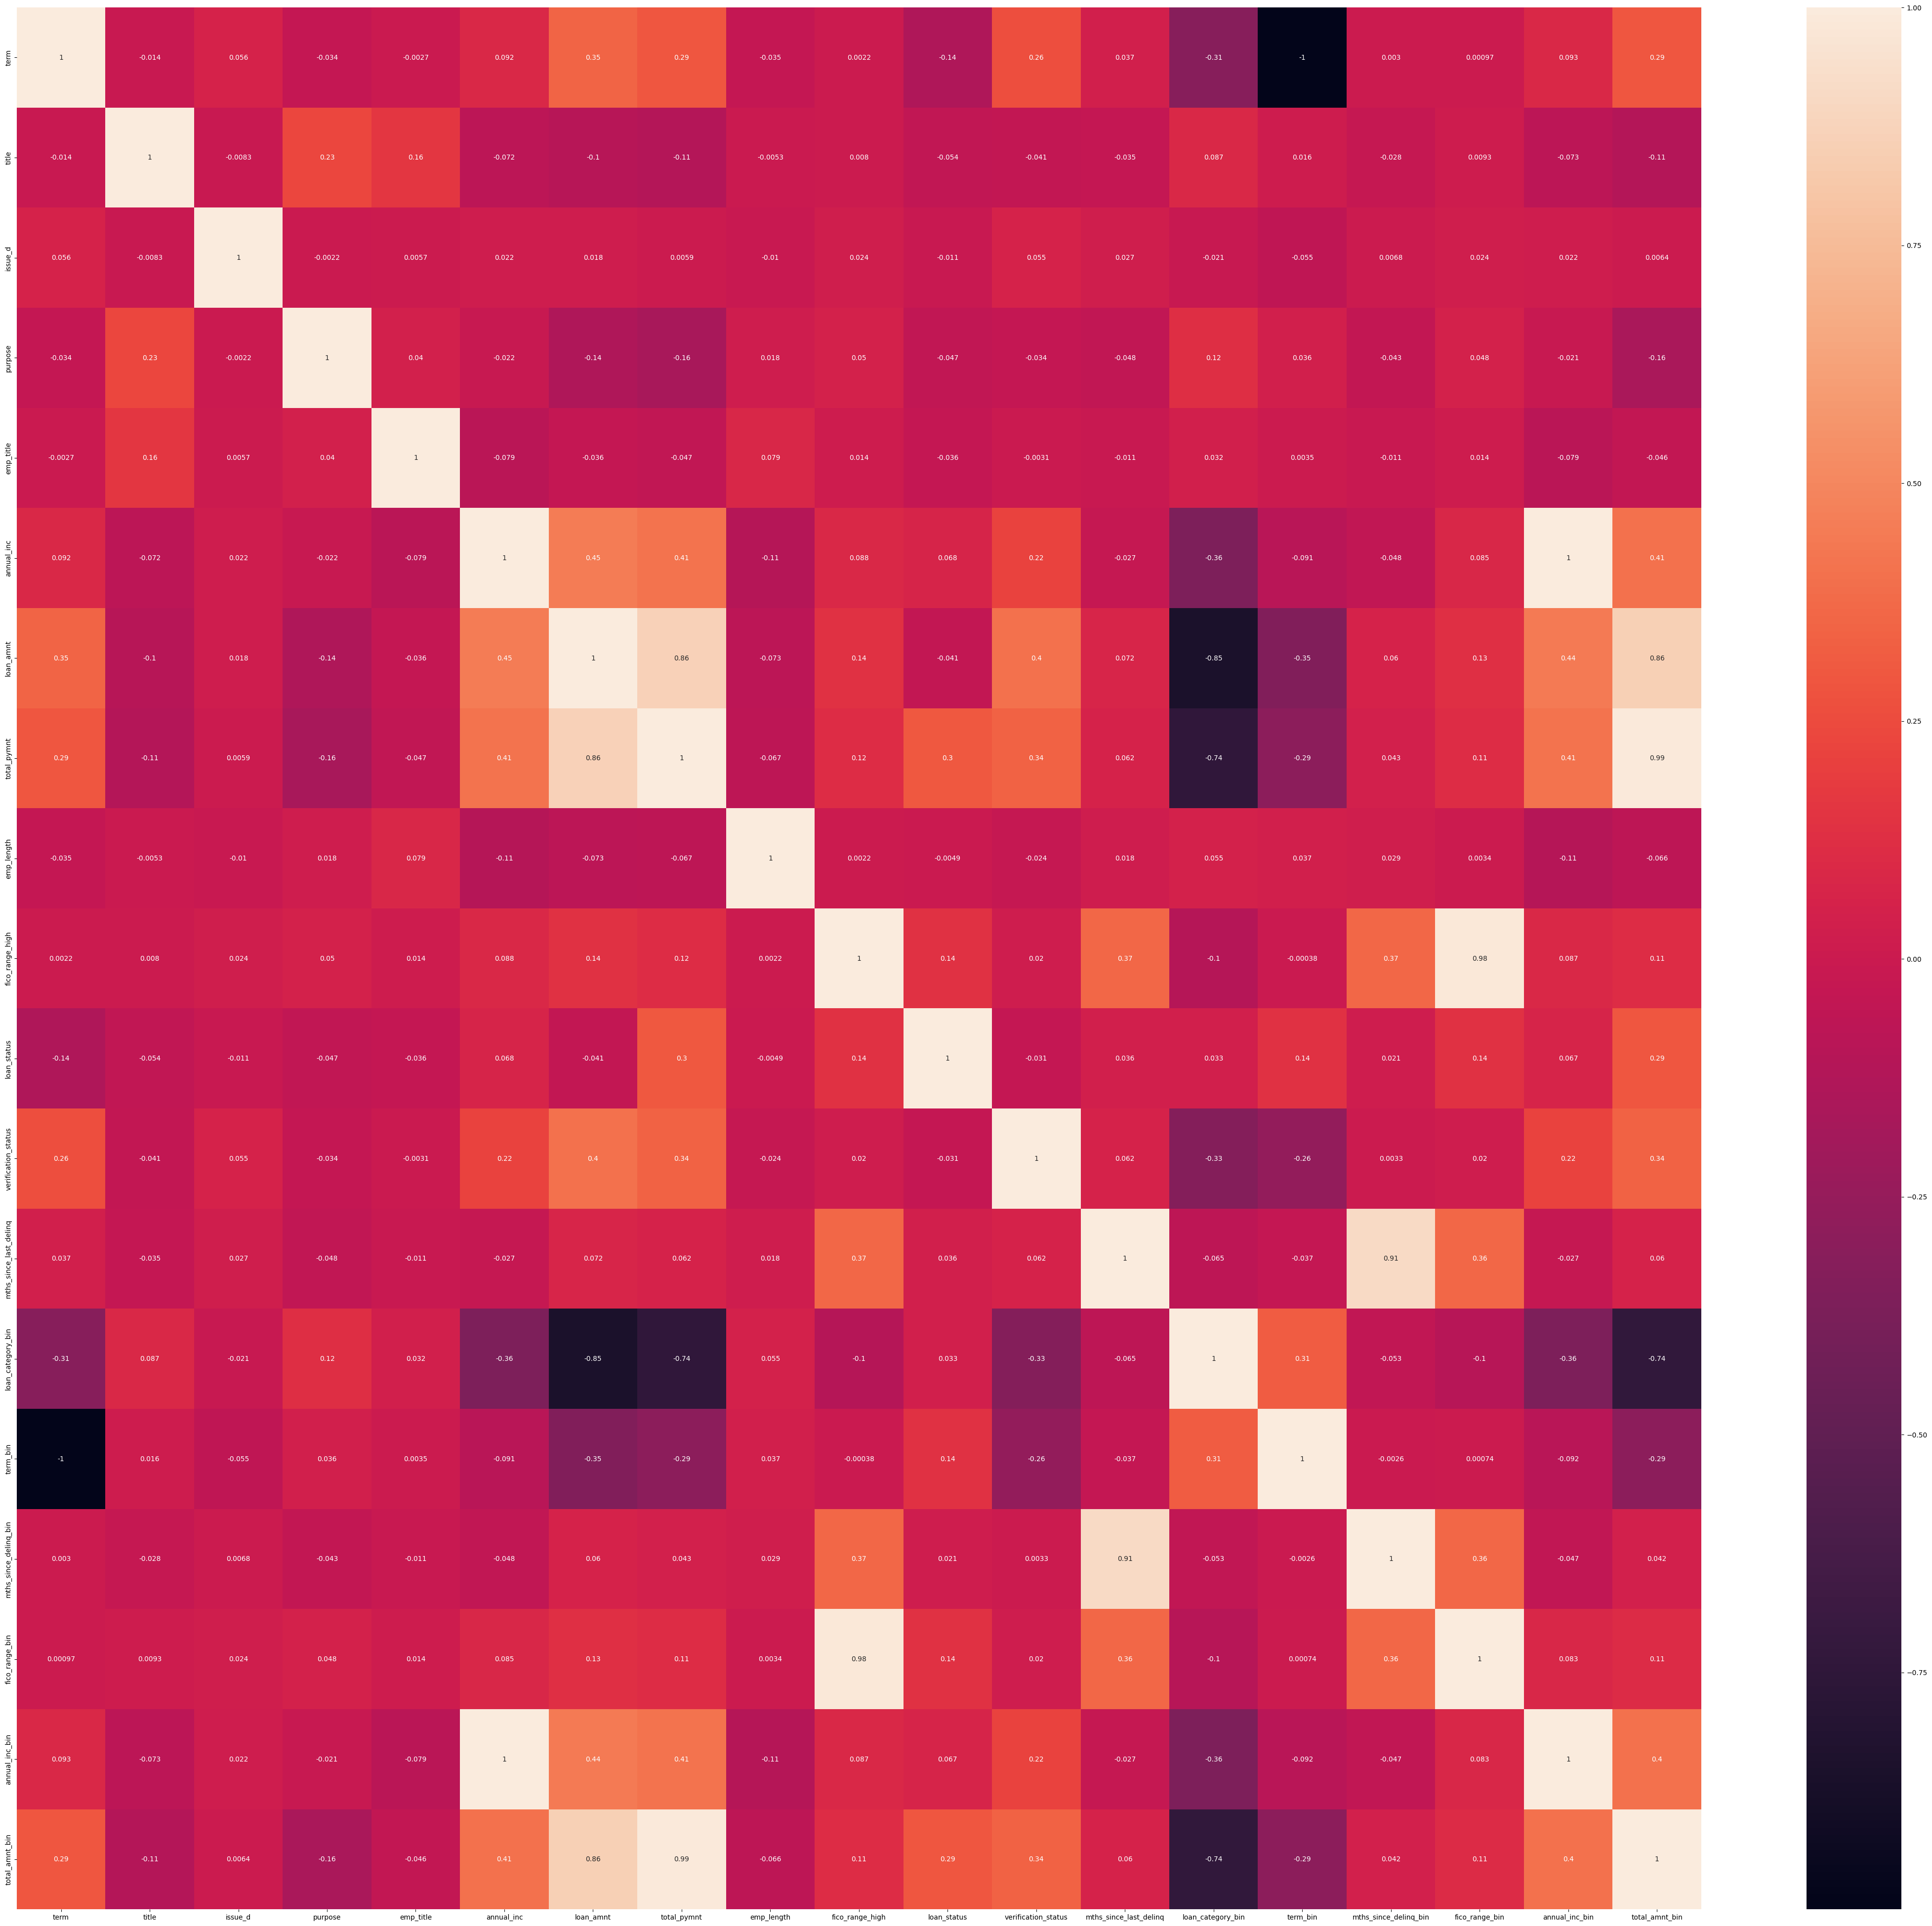

In [30]:
plt.figure(figsize=(55, 50))
corr = df1.corr()
sns.heatmap(corr, annot=True)

# F-Score, Recall and Confusion Matrix

Recall: 0.8271832944183213
F1-Score: 0.8742232974118034
Confusion Matrix:
[[ 1224   670]
 [  152 10717]]


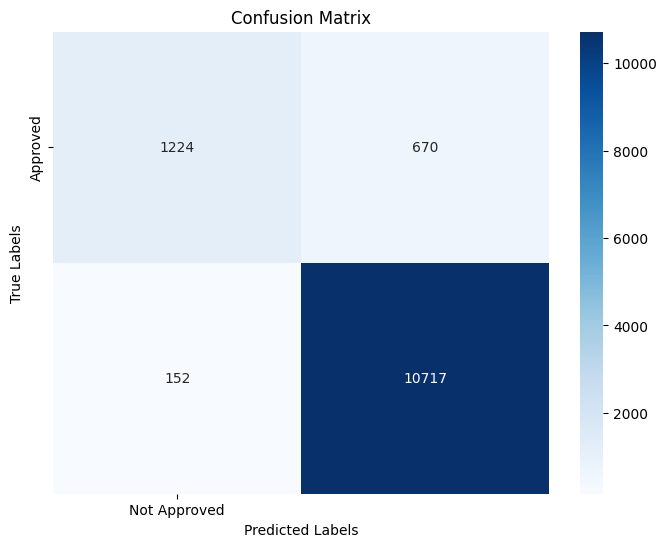

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate recall
recall = recall_score(y_test, y_pred_randf, average='macro')  # 'macro' for multiclass problems

# Calculate F1-score
f1 = f1_score(y_test, y_pred_randf, average='macro')  # 'macro' for multiclass problems

print("Recall:", recall)
print("F1-Score:", f1)

cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Not Approved"], yticklabels=["Approved"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [34]:
count = 0
for i in y_pred_log:
    count = count + 1
count

12763

In [43]:
predicted = []
for i in y_pred_log:
    if i==1:
        predicted.append("Approved")
    if i==0:
        predicted.append("Not Approved")

In [46]:
predicted

['Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Not Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Approved',
 'Appr

In [72]:
new_df = df.iloc[:12763]
new_df['predicted_status'] = predicted

/var/folders/pv/4ft5gnqd2_x640gdm7t1pd440000gn/T/ipykernel_5999/1402146586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['predicted_status'] = predicted


In [73]:
new_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,predicted_status
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,Sep-16,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Not Approved
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-16,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Approved
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,Sep-16,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,Approved
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,604.0,600.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N